<a href="https://colab.research.google.com/github/ForooghGharibiMonfared/Market_news_NLP/blob/main/News4MarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2,l1
import numpy as np
import csv
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print("Number of stopwords =", len(stopwords))
print(stopwords)
redundant_words =['Report:','BBC:','Russia Today:','(YouTube)','[VIDEO]']

def make_sentence_clean(sentence):
    sentence_cleaned = sentence.replace('U.S.','US').replace('U.N.','UN')
    for word in stopwords:
      token = " " + word + " "
      sentence_cleaned = sentence_cleaned.replace(token, " ")
    for word in redundant_words:
      sentence_cleaned = sentence_cleaned.replace(word, "")
    return sentence_cleaned

Number of stopwords = 179
{'am', 'did', 'why', 'themselves', 'she', 'were', 'until', 'not', 'haven', 'or', "haven't", 'he', 'just', 'and', 'herself', 'more', 'of', 'other', 'about', 'couldn', 'the', 'below', "wasn't", "shan't", 't', 'has', 'nor', 'm', 'for', 'these', 'its', 'too', "hasn't", 'ourselves', 'against', 'isn', 'should', 'what', 've', 'himself', 'needn', 'in', 'don', "mightn't", 'mustn', 'do', 'here', 'him', 'while', 'wouldn', 'up', 'been', 'mightn', "wouldn't", 'which', "shouldn't", 'most', 'an', "couldn't", 'own', 'itself', "hadn't", 'few', 'above', 'weren', 'yours', 'does', 'd', "aren't", 'all', 'no', 'by', 'as', 'such', 'i', 'yourselves', 'our', 'on', 'from', 'her', 'only', 'aren', 'down', 'because', 'yourself', 'was', 'very', 'ours', 'their', 'had', 'hers', 'can', 'o', "needn't", 'my', "you'd", "weren't", "she's", 'so', 'during', 'we', 'how', 'hasn', 'hadn', 'it', 'where', 'shan', "doesn't", 'being', "didn't", 'be', 'y', 'them', 'when', 'having', 'between', 'who', 'won',

In [ ]:
num_of_top_news = 5   #there are 25 top news headlines. We consider only the first num_of_top_news.
headline_length_cut = 15   #max number of words in a headline. The rest will be cut off.
num_dates = 0
max_num_of_words = 0
sum_of_all_words = 0

headlines_per_date = []
labels = []


with open("/content/Combined_News_DJIA.csv") as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(int(row[1]))
    row_mod=[' '.join(item[1:].split()[:headline_length_cut]) for item in row] # deleting leading "b"s and cutting the tail
    headlines_set ='  '.join(row_mod[2:num_of_top_news+2])  # reduce the top news number
    headlines_cleaned = make_sentence_clean(headlines_set)
    headlines_per_date.append(headlines_cleaned) #  joined headlines corresponding to a date
    num_of_words = len(headlines_cleaned.split())
    sum_of_all_words = sum_of_all_words + num_of_words
    max_num_of_words = num_of_words if num_of_words > max_num_of_words else max_num_of_words
    num_dates = num_dates + 1

print(num_dates, "rows are read.")
print(headlines_per_date[:1])
print("Max number of words per sentence =",max_num_of_words)
mean_num_of_words = int(sum_of_all_words/num_dates)
print("Mean number of words per sentence =", mean_num_of_words)

1989 rows are read.
['"Georgia \'downs two Russian warplanes\' countries move brink war"  \' Musharraf impeached.\'  \' Columns troops roll South Ossetia; footage fighting \'  \'Russian tanks moving towards capital South Ossetia, reportedly completely  "Afghan children raped \'impunity,\' UN official says - sick, three year  \'150 Russian tanks entered South Ossetia whilst Georgia shoots two Russian jets.\'  " Georgia invades South Ossetia, Russia warned would intervene SO\'s side"  "The \'enemy combatent\' trials nothing sham: Salim Haman sentenced  \'Georgian troops retreat S. Osettain capital, presumably leaving several hundred people killed. \'  \'Did US Prep Georgia War Russia?\'  \'Rice Gives Green Light Israel Attack Iran: Says US veto  \'Class Action Lawsuit Behalf American Public Against FBI\'  "So---Russia Georgia war NYT\'s top story opening ceremonies  "China tells Bush stay countries\' affairs"  \'Did World War III start today?\'  \'Georgia Invades South Ossetia - Russia g

In [ ]:
labels = np.array(labels)
split_time = int(num_dates * 0.8)                #80% Training, 20% Testing
print("number of training sentences = ", split_time)
training_sentences = headlines_per_date[:split_time]
test_sentences = headlines_per_date[split_time:]
training_labels = labels[:split_time]
test_labels = labels[split_time:]

number of training sentences =  1591


In [ ]:
embedding_dim = 100
max_length = mean_num_of_words #max_num_of_words
trunc_type='post'
padding_type='post'
vocab_size = 5000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
#vocab_size=len(word_index)
print("There are {} different words in our modified headlines".format(len(word_index)))

There are 36479 different words in our modified headlines


In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
training_padded = np.array(training_padded)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = np.array(test_padded)

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(training_sentences[3])
print(decode_review(training_padded[3]))
print(training_padded[3])

' US refuses Israel weapons attack Iran: report'  "When president ordered attack Tskhinvali [the capital South Ossetia], knew  ' Israel clears troops killed Reuters cameraman'  'Britain\'s policy tough drugs "pointless", says former civil servant  'Body 14 year old found trunk; Latest (ransom paid) kidnapping victim Mexico.  'China moved 10 *million* quake survivors prefab homes'  "Bush announces Operation Get All Up In Russia's Grill. Yeah, end well."  'Russian forces sink Georgian ships '  "The commander Navy air reconnaissance squadron provides President defense  "92% CNN readers: Russia's actions Georgia - justified!"  'USA send fleet Black Sea help Georgia, send troops "humanitarian aid  "US warns Israeli plan strike Iran's nuclear facilities"  "In intriguing cyberalliance, two Estonian computer experts heading Georgia keep  'The CNN Effect: Georgia Schools Russia Information Warfare'  'Why Russias response Georgia right'  'Elephants extinct 2020?'  'US humanitarian missions soon 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size + 1, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Conv1D(128, 5, activation='relu'),
    #tf.keras.layers.GlobalAveragePooling1D(),
    #tf.keras.layers.GlobalMaxPooling1D(),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(max_length*embedding_dim, activation='relu'), #kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(int(max_length*embedding_dim/3), activation='relu'),#kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(168, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 223, 100)          500100    
_________________________________________________________________
flatten (Flatten)            (None, 22300)             0         
_________________________________________________________________
dropout (Dropout)            (None, 22300)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1427264   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,927,429
Trainable params: 1,927,429
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(training_padded, training_labels, epochs=20, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/20
50/50 - 3s - loss: 0.9782 - accuracy: 0.5437 - val_loss: 0.7694 - val_accuracy: 0.5075
Epoch 2/20
50/50 - 0s - loss: 0.7260 - accuracy: 0.7530 - val_loss: 0.9336 - val_accuracy: 0.5050
Epoch 3/20
50/50 - 0s - loss: 0.5210 - accuracy: 0.9767 - val_loss: 0.9739 - val_accuracy: 0.5377
Epoch 4/20
50/50 - 0s - loss: 0.3286 - accuracy: 0.9994 - val_loss: 0.8936 - val_accuracy: 0.5276
Epoch 5/20
50/50 - 0s - loss: 0.2220 - accuracy: 1.0000 - val_loss: 0.8754 - val_accuracy: 0.5201
Epoch 6/20
50/50 - 0s - loss: 0.1854 - accuracy: 1.0000 - val_loss: 0.8763 - val_accuracy: 0.5276
Epoch 7/20
50/50 - 0s - loss: 0.1566 - accuracy: 1.0000 - val_loss: 0.8577 - val_accuracy: 0.5050
Epoch 8/20
50/50 - 0s - loss: 0.1364 - accuracy: 1.0000 - val_loss: 0.9156 - val_accuracy: 0.5050
Epoch 9/20
50/50 - 0s - loss: 0.1301 - accuracy: 1.0000 - val_loss: 0.9046 - val_accuracy: 0.4874
Epoch 10/20
50/50 - 0s - loss: 0.1089 - accuracy: 1.0000 - val_loss: 0.8179 - val_accuracy: 0.5075
Epoch 11/20
50/50 -

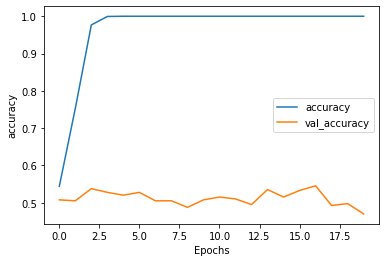

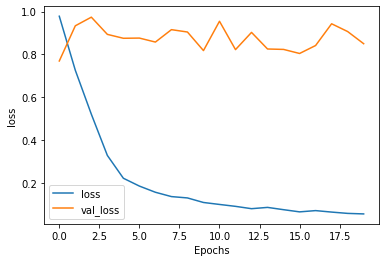

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Second attemp using LSTM/GRU in the model to avoid overfitting:


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size + 1, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, dropout=0.5)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.LSTM(128),
    #tf.keras.layers.GRU(64),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 223, 100)          500100    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 219, 128)          64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 109, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 107, 64)           24640     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               132000    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 721,069
Trainable params: 721,069
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(training_padded, training_labels, epochs=15, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/15
50/50 - 9s - loss: 0.6925 - accuracy: 0.5267 - val_loss: 0.6935 - val_accuracy: 0.5075
Epoch 2/15
50/50 - 1s - loss: 0.6843 - accuracy: 0.5424 - val_loss: 0.6969 - val_accuracy: 0.5075
Epoch 3/15
50/50 - 1s - loss: 0.5360 - accuracy: 0.7241 - val_loss: 0.8735 - val_accuracy: 0.5226
Epoch 4/15
50/50 - 1s - loss: 0.1143 - accuracy: 0.9604 - val_loss: 1.5741 - val_accuracy: 0.5050
Epoch 5/15
50/50 - 1s - loss: 0.0160 - accuracy: 0.9981 - val_loss: 2.0163 - val_accuracy: 0.5000
Epoch 6/15
50/50 - 1s - loss: 0.0054 - accuracy: 0.9994 - val_loss: 2.2262 - val_accuracy: 0.5050
Epoch 7/15
50/50 - 1s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.3242 - val_accuracy: 0.5151
Epoch 8/15
50/50 - 1s - loss: 5.3149e-04 - accuracy: 1.0000 - val_loss: 2.4199 - val_accuracy: 0.5151
Epoch 9/15
50/50 - 1s - loss: 4.3286e-04 - accuracy: 1.0000 - val_loss: 2.5394 - val_accuracy: 0.5025
Epoch 10/15
50/50 - 1s - loss: 2.9786e-04 - accuracy: 1.0000 - val_loss: 2.6190 - val_accuracy: 0.4950
Epoch 1

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size + 1, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(32, 7, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(32, 7, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout =0.2, recurrent_dropout=0.5)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, recurrent_dropout=0.5, return_sequences = True)),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.LSTM(32, dropout=0.5),
    #tf.keras.layers.GRU(64),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 223, 100)          500100    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 217, 32)           22432     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 108, 32)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 102, 32)           7200      
_________________________________________________________________
gru (GRU)                    (None, 64)                18816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [ ]:
history = model.fit(training_padded, training_labels, epochs=15, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/15
50/50 - 3s - loss: 0.6916 - accuracy: 0.5355 - val_loss: 0.6932 - val_accuracy: 0.5075
Epoch 2/15
50/50 - 1s - loss: 0.6640 - accuracy: 0.5569 - val_loss: 0.8248 - val_accuracy: 0.4975
Epoch 3/15
50/50 - 1s - loss: 0.3347 - accuracy: 0.8416 - val_loss: 1.1471 - val_accuracy: 0.4673
Epoch 4/15
50/50 - 1s - loss: 0.0797 - accuracy: 0.9635 - val_loss: 1.9993 - val_accuracy: 0.5126
Epoch 5/15
50/50 - 1s - loss: 0.0261 - accuracy: 0.9887 - val_loss: 2.7116 - val_accuracy: 0.5050
Epoch 6/15
50/50 - 1s - loss: 0.0148 - accuracy: 0.9956 - val_loss: 2.6839 - val_accuracy: 0.5151
Epoch 7/15
50/50 - 1s - loss: 0.0045 - accuracy: 0.9994 - val_loss: 2.9170 - val_accuracy: 0.5075
Epoch 8/15
50/50 - 1s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.2943 - val_accuracy: 0.5126
Epoch 9/15
50/50 - 1s - loss: 2.8736e-04 - accuracy: 1.0000 - val_loss: 3.3915 - val_accuracy: 0.5151
Epoch 10/15
50/50 - 1s - loss: 1.5733e-04 - accuracy: 1.0000 - val_loss: 3.4512 - val_accuracy: 0.5201
Epoch 11/15